In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']-1), 6)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('Dataset/train')
valid_files, valid_targets = load_dataset('Dataset/test')
#test_files, test_targets = load_dataset('/data/dog_images/test')


Using TensorFlow backend.


In [2]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(32, 32))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [3]:
array_names = ['Jack','Khaled','Mina','Mostafa','Nardeen','Shreif']

In [4]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255

100%|██████████| 1240/1240 [00:00<00:00, 1733.71it/s]


In [5]:
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255

100%|██████████| 304/304 [00:00<00:00, 1711.39it/s]


In [16]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
import keras

model = Sequential()

### TODO: Define your architecture.-
layer1 = model.add(Conv2D(32, (3,3), padding='same', activation='relu',input_shape=train_tensors[0].shape))

maxpool1 = model.add(MaxPooling2D((2,2),strides=(2,2),padding='valid'))
#model.add(Dropout(0.3))
layer2 = model.add(Conv2D(64, (3,3),strides=(3,3), padding='same', activation='relu'))

maxpool2 = model.add(MaxPooling2D((2,2),strides=(2,2),padding='valid'))

layer3 = model.add(Conv2D(128, (3,3),strides=(2,2), padding='same', activation='relu'))

maxpool3 = model.add(MaxPooling2D((1,1),strides=(1,1),padding='valid'))
model.add(Dropout(0.3))

layer4 = model.add(Conv2D(256, (3,3),strides=(1,1), padding='same', activation='relu'))

# hidden1 = model.add(Dense(128))
# hidden2 = model.add(Dense(64))

#model.add(Dropout(0.3))
gloabalAverage = model.add(GlobalAveragePooling2D())
Dense = model.add(Dense(6,activation='softmax'))
model.summary()
opt = keras.optimizers.RMSprop()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2, 2, 128)         0         
__________

In [14]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense,BatchNormalization
from keras.models import Sequential
import keras
# VGGnet arch....
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape = (32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(250, activation='relu'))

model.add(Dense(6, activation = 'softmax'))
model.summary()
opt = keras.optimizers.RMSprop()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
batch_normalization_11 (Batc (None, 15, 15, 128)       512       
__________

In [15]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 100

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weightsVGGNet.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 1240 samples, validate on 304 samples
Epoch 1/100
1240/1240 [==============================] - 4s 3ms/step - loss: 2.0489 - acc: 0.5323 - val_loss: 2.7719 - val_acc: 0.1743
Epoch 2/100
1240/1240 [==============================] - 2s 2ms/step - loss: 1.3983 - acc: 0.6581 - val_loss: 3.3146 - val_acc: 0.2204
Epoch 3/100
1240/1240 [==============================] - 2s 2ms/step - loss: 1.0736 - acc: 0.7218 - val_loss: 1.6023 - val_acc: 0.3454
Epoch 4/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.6849 - acc: 0.8105 - val_loss: 1.6031 - val_acc: 0.4572
Epoch 5/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.5378 - acc: 0.8565 - val_loss: 1.2554 - val_acc: 0.6612
Epoch 6/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.4383 - acc: 0.8694 - val_loss: 0.9575 - val_acc: 0.6875
Epoch 7/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.4795 - acc: 0.8790 - val_loss: 0.7093 - val_acc: 0.8289
Epoch 8/

Epoch 30/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0648 - acc: 0.9863 - val_loss: 1.0097 - val_acc: 0.8355
Epoch 31/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0786 - acc: 0.9871 - val_loss: 0.4849 - val_acc: 0.9243
Epoch 32/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.1146 - acc: 0.9782 - val_loss: 0.6039 - val_acc: 0.9178
Epoch 33/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0650 - acc: 0.9839 - val_loss: 0.9801 - val_acc: 0.8783
Epoch 34/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.1075 - acc: 0.9798 - val_loss: 0.6996 - val_acc: 0.9145
Epoch 35/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0635 - acc: 0.9839 - val_loss: 0.8931 - val_acc: 0.8750
Epoch 36/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0644 - acc: 0.9855 - val_loss: 1.1729 - val_acc: 0.8388
Epoch 37/100
1240/1240 [========================

1240/1240 [==============================] - 2s 2ms/step - loss: 0.0164 - acc: 0.9984 - val_loss: 0.9527 - val_acc: 0.8849
Epoch 63/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0702 - acc: 0.9903 - val_loss: 0.9464 - val_acc: 0.8882
Epoch 64/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.1008 - acc: 0.9895 - val_loss: 0.8536 - val_acc: 0.9112
Epoch 65/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0410 - acc: 0.9911 - val_loss: 0.7258 - val_acc: 0.9145
Epoch 66/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0419 - acc: 0.9895 - val_loss: 0.6327 - val_acc: 0.9375
Epoch 67/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0312 - acc: 0.9952 - val_loss: 0.7908 - val_acc: 0.9145
Epoch 68/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0326 - acc: 0.9952 - val_loss: 0.4468 - val_acc: 0.9539
Epoch 69/100
1240/1240 [==============================] - 2s 

1240/1240 [==============================] - 2s 2ms/step - loss: 0.0013 - acc: 0.9992 - val_loss: 0.7836 - val_acc: 0.9211
Epoch 95/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0233 - acc: 0.9968 - val_loss: 0.7533 - val_acc: 0.9145
Epoch 96/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0139 - acc: 0.9984 - val_loss: 0.4162 - val_acc: 0.9441
Epoch 97/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0175 - acc: 0.9984 - val_loss: 0.4798 - val_acc: 0.9441
Epoch 98/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0252 - acc: 0.9960 - val_loss: 1.0525 - val_acc: 0.8816
Epoch 99/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0890 - acc: 0.9895 - val_loss: 0.9586 - val_acc: 0.9112
Epoch 100/100
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0141 - acc: 0.9968 - val_loss: 0.8234 - val_acc: 0.9211


In [16]:
model.evaluate(valid_tensors, valid_targets)

304/304 [==============================] - 0s 530us/step


[0.82337356929201633, 0.92105263157894735]

In [10]:
model.load_weights('saved_models/weightsVGGNet.best.from_scratch.hdf5')
def predicate_name(img_path):
#     img_path = 'testing/Khaled.jpg'
    predicted_vector = model.predict(path_to_tensor(img_path))
    return (img_path, predicted_vector)


ValueError: num must be 1 <= num <= 20, not 21

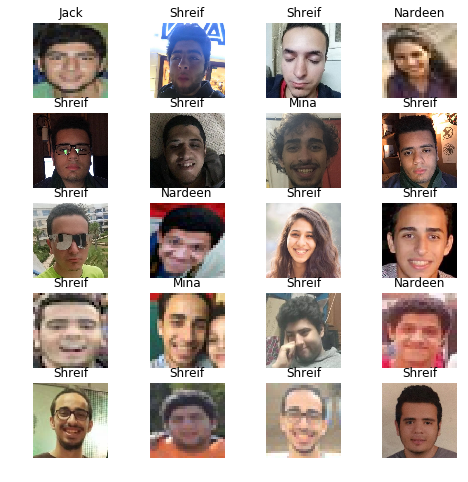

In [21]:
import os
import matplotlib.pyplot as plt
from PIL import Image

images = [predicate_name('predict/khaled/'+f) for f in os.listdir('predict/khaled')]
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i, (img, pred) in enumerate(images):
#     print(class_name[pred])
    fig.add_subplot(rows, columns, i + 1)
    img = Image.open(img)
    plt.imshow(img)
    plt.title(array_names[np.argmax(pred)])
    plt.axis('off')
plt.show()

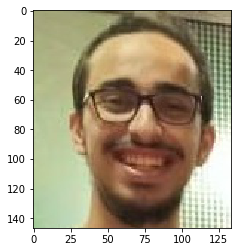

[[ 0.  0.  1.  0.  0.  0.]]
Mina


In [245]:
predicate_name('testing/mina.jpg')

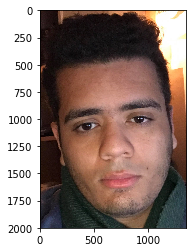

[[ 0.  0.  0.  1.  0.  0.]]
Mostafa


In [246]:
predicate_name('testing/sherif.jpg')

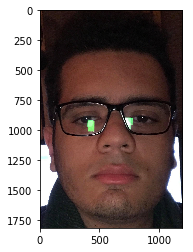

[[ 0.  0.  0.  0.  0.  1.]]
Shreif


In [247]:
predicate_name('testing/sherif_2.jpg')

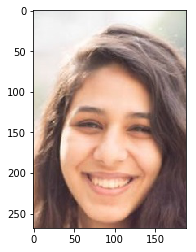

[[ 0.  0.  0.  0.  0.  1.]]
Shreif


In [248]:
predicate_name('testing/nardeen.jpg')

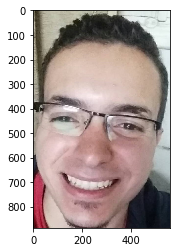

[[ 0.  1.  0.  0.  0.  0.]]
Khaled


In [249]:
predicate_name('testing/Khaled.jpg')

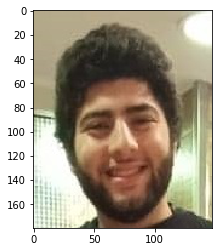

[[ 1.  0.  0.  0.  0.  0.]]
Jack


In [250]:
predicate_name('testing/jack.jpg')

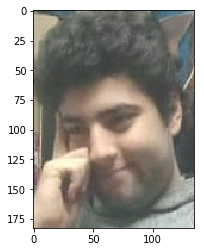

[[ 1.  0.  0.  0.  0.  0.]]
Jack


In [251]:
predicate_name('testing/jac_cropped.jpg')

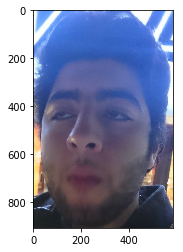

[[ 0.  0.  0.  1.  0.  0.]]
Mostafa


In [252]:
predicate_name('testing/jack_2.jpg')

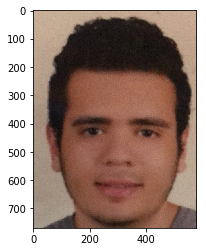

[[ 0.  0.  0.  1.  0.  0.]]
Mostafa


In [253]:
predicate_name('testing/sherif_3_c.jpg')

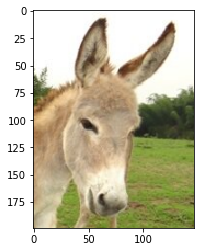

[[ 0.  0.  0.  0.  0.  1.]]
Shreif


In [242]:
predicate_name('testing/7omar.png')

In [4]:
# import extract_bottleneck_features as ebf
# def paths_to_tensor_bottleneck(img_paths):
#     list_of_tensors = [ebf.extract_Xception(path_to_tensor(img_path)) for img_path in tqdm(img_paths)]
#     return np.vstack(list_of_tensors)


In [8]:
# train_xception_tensors = paths_to_tensor_bottleneck(train_files[:100])
# valid_xception_tensors = paths_to_tensor_bottleneck(valid_files[:100])


  3%|▎         | 3/100 [00:22<12:16,  7.60s/it]

KeyboardInterrupt: 

In [5]:
# ### TODO: Define your architecture.
# from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from keras.layers import Dropout, Flatten, Dense
# from keras.models import Sequential
# import keras

# resnet = Sequential()
# resnet.add(GlobalAveragePooling2D(input_shape=train_xception_tensors.shape[1:]))
# resnet.add(Dense(164,activation='relu'))
# resnet.add(Dropout(0.4))
# resnet.add(Dense(6,activation='softmax'))
# resnet.summary()

NameError: name 'train_xception_tensors' is not defined

In [6]:
train_xception_tensors.shape

(1240, 32, 32, 3)

In [27]:
# opt = keras.optimizers.RMSprop(0.1)
# resnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# from keras.callbacks import ModelCheckpoint  

# ### TODO: specify the number of epochs that you would like to use to train the model.

# epochs = 200

# ### Do NOT modify the code below this line.

# checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_resnet.hdf5', 
#                                verbose=1, save_best_only=True)

# resnet.fit(train_xception_tensors, train_targets, 
#           validation_data=(valid_xception_tensors, valid_targets),
#           epochs=epochs, batch_size=100, callbacks=[checkpointer], verbose=1)

Train on 1240 samples, validate on 304 samples
Epoch 1/200
1240/1240 [==============================] - 1s 418us/step - loss: 12.6223 - acc: 0.1653 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 2/200
1240/1240 [==============================] - 0s 67us/step - loss: 13.5564 - acc: 0.1589 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 3/200
1240/1240 [==============================] - 0s 77us/step - loss: 13.5314 - acc: 0.1605 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 4/200
1240/1240 [==============================] - 0s 76us/step - loss: 13.4997 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 5/200
1240/1240 [==============================] - 0s 64us/step - loss: 13.5651 - acc: 0.1573 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 6/200
1240/1240 [==============================] - 0s 67us/step - loss: 13.5481 - acc: 0.1581 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 7/200
1240/1240 [==============================] - 0s 66us/step - loss: 13.5964 - acc: 0.1565 - val_loss: 13.4671 - va

Epoch 63/200
1240/1240 [==============================] - 0s 62us/step - loss: 13.5054 - acc: 0.1621 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 64/200
1240/1240 [==============================] - 0s 61us/step - loss: 13.5314 - acc: 0.1605 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 65/200
1240/1240 [==============================] - 0s 61us/step - loss: 13.4924 - acc: 0.1629 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 66/200
1240/1240 [==============================] - 0s 62us/step - loss: 13.5314 - acc: 0.1605 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 67/200
1240/1240 [==============================] - 0s 60us/step - loss: 13.5314 - acc: 0.1605 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 68/200
1240/1240 [==============================] - 0s 62us/step - loss: 13.5054 - acc: 0.1621 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 69/200
1240/1240 [==============================] - 0s 59us/step - loss: 13.5054 - acc: 0.1621 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 70/200
1240/1240 [===

Epoch 95/200
1240/1240 [==============================] - 0s 58us/step - loss: 13.5314 - acc: 0.1605 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 96/200
1240/1240 [==============================] - 0s 58us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 97/200
1240/1240 [==============================] - 0s 59us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 98/200
1240/1240 [==============================] - 0s 61us/step - loss: 13.5054 - acc: 0.1621 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 99/200
1240/1240 [==============================] - 0s 59us/step - loss: 13.5574 - acc: 0.1589 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 100/200
1240/1240 [==============================] - 0s 60us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 101/200
1240/1240 [==============================] - 0s 61us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 102/200
1240/1240 [

Epoch 127/200
1240/1240 [==============================] - 0s 59us/step - loss: 13.5314 - acc: 0.1605 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 128/200
1240/1240 [==============================] - 0s 60us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 129/200
1240/1240 [==============================] - 0s 59us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 130/200
1240/1240 [==============================] - 0s 60us/step - loss: 13.5146 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 131/200
1240/1240 [==============================] - 0s 58us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 132/200
1240/1240 [==============================] - 0s 63us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 133/200
1240/1240 [==============================] - 0s 61us/step - loss: 13.5080 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 134/200
1240/1

Epoch 159/200
1240/1240 [==============================] - 0s 60us/step - loss: 13.5314 - acc: 0.1605 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 160/200
1240/1240 [==============================] - 0s 59us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 161/200
1240/1240 [==============================] - 0s 59us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 162/200
1240/1240 [==============================] - 0s 59us/step - loss: 13.4822 - acc: 0.1629 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 163/200
1240/1240 [==============================] - 0s 56us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 164/200
1240/1240 [==============================] - 0s 58us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 165/200
1240/1240 [==============================] - 0s 60us/step - loss: 13.4924 - acc: 0.1629 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 166/200
1240/1

Epoch 191/200
1240/1240 [==============================] - 0s 63us/step - loss: 13.5314 - acc: 0.1605 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 192/200
1240/1240 [==============================] - 0s 60us/step - loss: 13.5071 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 193/200
1240/1240 [==============================] - 0s 61us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 194/200
1240/1240 [==============================] - 0s 60us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 195/200
1240/1240 [==============================] - 0s 58us/step - loss: 13.5184 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 196/200
1240/1240 [==============================] - 0s 61us/step - loss: 13.5074 - acc: 0.1613 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 197/200
1240/1240 [==============================] - 0s 61us/step - loss: 13.4813 - acc: 0.1629 - val_loss: 13.4671 - val_acc: 0.1645
Epoch 198/200
1240/1

In [4]:
# resnet.load_weights('saved_models/weights.best.from_resnet.hdf5')

NameError: name 'resnet' is not defined

In [23]:
# ### TODO: Write a function that takes a path to an image as input
# ### and returns the dog breed that is predicted by the model.
# # import extract_bottleneck_features as ebf
# def Resnet_predict_breed(img_path):
#     # extract bottleneck features
#     tensor = path_to_tensor(img_path)
#     print(tensor.shape)
#     bottleneck_feature = ebf.extract_Xception(tensor);
#     # obtain predicted vector
#     predicted_vector = resnet.predict(bottleneck_feature);
#     # return dog breed that is predicted by the model
#     print(predicted_vector)
#     return array_names[np.argmax(predicted_vector)].split('.')[-1]

In [24]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# def Dog_breed_detector(img_path):
#     img = mpimg.imread(img_path)
#     _ = plt.imshow(img)
#     name = Resnet_predict_breed(img_path)
#     plt.show()

ValueError: Error when checking : expected global_average_pooling2d_2_input to have shape (None, 32, 32, 3) but got array with shape (1, 1, 1, 2048)

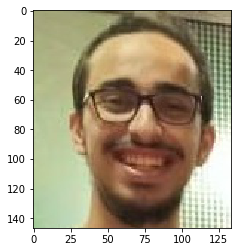

In [25]:
# Dog_breed_detector('testing/mina.jpg')